### Objective
The organization is keen on identifying the underlying factors contributing to employee turnover and developing a robust model to forecast the probability of an employee departing. This initiative aims to enhance tailored retention strategies, enabling senior management to make well-informed, strategic decisions.
### Loading the data & libraries

In [140]:
import pandas as pd # for data manipulation
import numpy as np # for numerical computations
import matplotlib.pyplot as plt # for plotting visualizations
import matplotlib as mpl # for plotting visualizations
import seaborn as sns # for plotting visualizations


In [141]:
# Load the data
df = pd.read_csv('HR_comma_sep.csv')

### Reviewing Sata Structure

In [142]:
df.isnull().any() # check for missing values

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [143]:
# The result shows that there are no missing values in the dataset
# overview of the dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [144]:
# Rename the specific columns to enhance readability.
df = df.rename(columns={'satisfaction_level': 'satisfaction_level', 
                        'last_evaluation': 'evaluation_level',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'attrition'
                        })

In [145]:
# Check the type of the data features
df.dtypes

satisfaction_level     float64
evaluation_level       float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
attrition                int64
promotion                int64
department              object
salary                  object
dtype: object

In [146]:
# Calculation of the rate of attrition
attrition_rate = df.attrition.value_counts() / len(df)
attrition_rate

0    0.761917
1    0.238083
Name: attrition, dtype: float64

#### Descriptive Analysis

In [147]:
# overview of the dataset
df.describe()
# 0 represents employees who stayed and 1 represents employees who left

,satisfaction_level,evaluation_level,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,attrition,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [148]:
# overview of the summary (attrition VS non-attrition)
df.groupby('attrition').mean() 

,satisfaction_level,evaluation_level,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
attrition,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


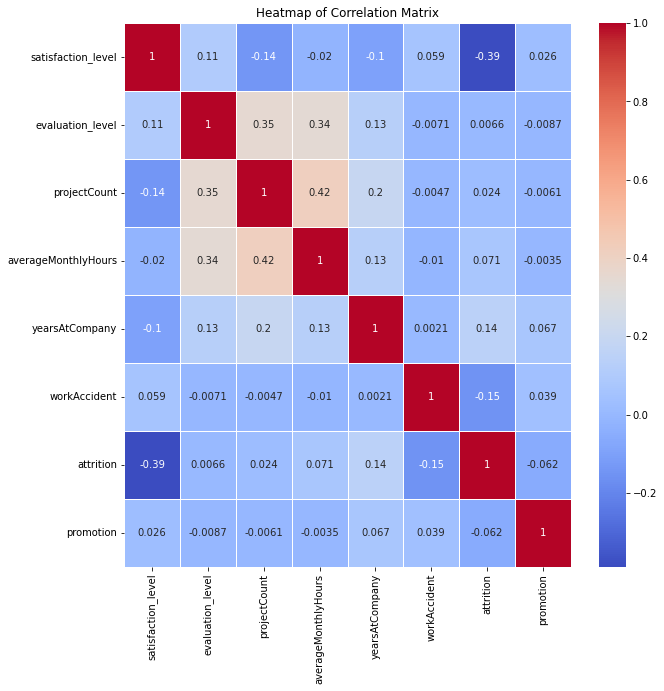

In [149]:
# Correlation matrix & Heatmap
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


The heatmap shows that there are three positive correlations involving the evaluation, number of projects, and average monthly hours. 
- The number of projects and average monthly hours have a correlation of 0.42.
- The evaluation and number of projects have a correlation of 0.35.
- The evaluation and average monthly hours have a correlation of 0.34.

The heatmap also shows that there is a strong negative correlations between satisfaction level and attrition rate.
- The satisfaction level and attrition rate have a correlation of -0.39.

To sum up, on the one hand, the staff who spent more hours and did more projects were evaluated highly. On the other hand, staff tend to leave the firm when they are less satisfied.

#### Distribution plots variabe analysis

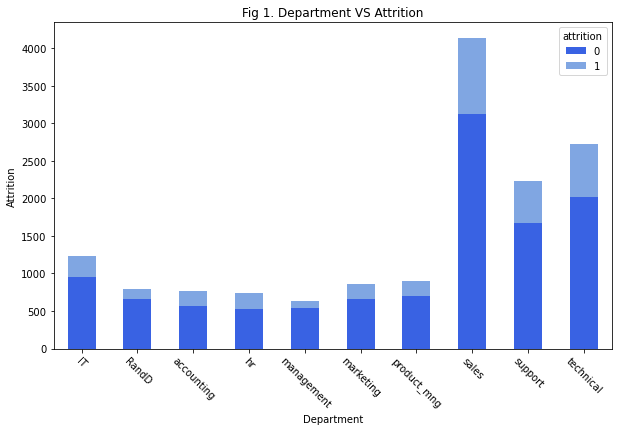

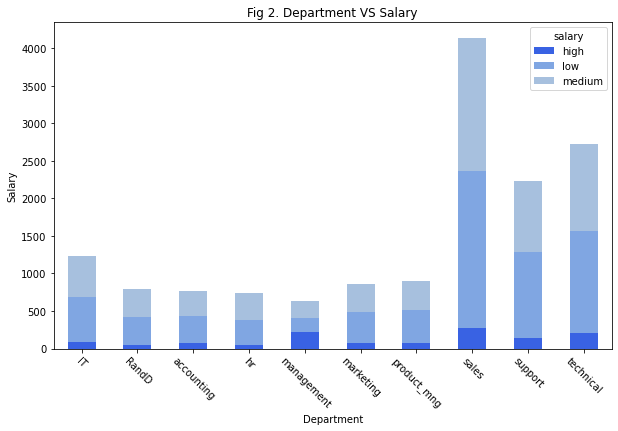

In [150]:
# Department VS Attrition using corss tab
department = pd.crosstab(df.department, df.attrition)
department.plot(kind='bar', stacked=True, figsize=(10,6),color=['#3962e3','#80a6e2'])
plt.title('Fig 1. Department VS Attrition')
plt.xlabel('Department')
plt.ylabel('Attrition')
plt.xticks(rotation=-45)
plt.show()

# Department VS salary using corss tab
salary = pd.crosstab(df.department, df.salary)
salary.plot(kind='bar', stacked=True, figsize=(10,6),color=['#3962e3','#80a6e2','#a7c0de'])
plt.title('Fig 2. Department VS Salary')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=-45)
plt.show()

The department VS attrition graph shows that the attrition rate is highest in the sales department and lowest in the management department.
The department VS salary graph shows that the sales department has the highest number of employees with low salary and management department has the highest number of employees with high salary.
Combining figures 1 and 2 shows that management has the highest salaries and the lowest turnover rate.

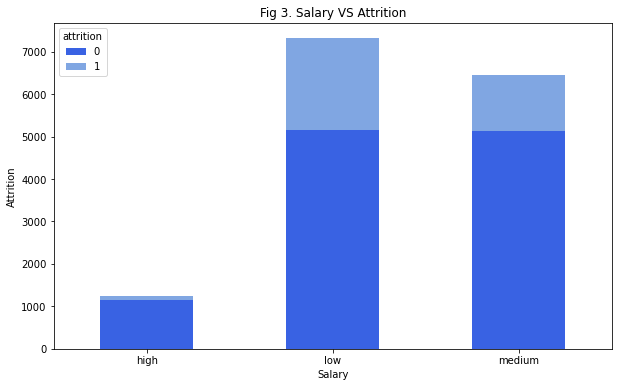

In [151]:
# salary VS Attrition using corss tab 
salary = pd.crosstab(df.salary, df.attrition)
salary.plot(kind='bar', stacked=True, figsize=(10,6),color=['#3962e3','#80a6e2'])
plt.title('Fig 3. Salary VS Attrition')
plt.xlabel('Salary')
plt.ylabel('Attrition')
plt.xticks(rotation=0)
plt.show()

Figure 3 indicates that employees who leave are almost always paid low to moderate salaries, and very few high-tech employees leave the company.

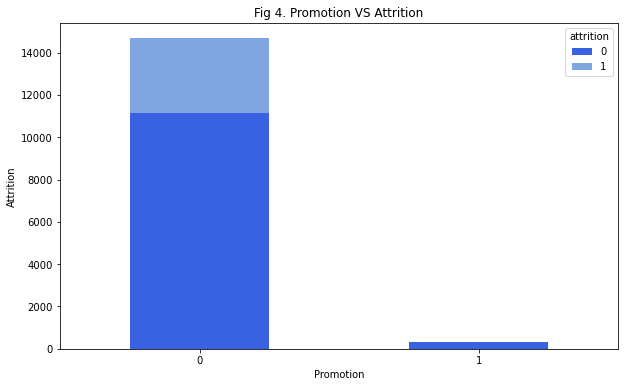

In [152]:
# Promotion VS Attrition using corss tab
promotion = pd.crosstab(df.promotion, df.attrition)
promotion.plot(kind='bar', stacked=True, figsize=(10,6),color=['#3962e3','#80a6e2'])
plt.title('Fig 4. Promotion VS Attrition')
plt.xlabel('Promotion')
plt.ylabel('Attrition')
plt.xticks(rotation=0)
plt.show()

Figure 4 shows that employees who were not promoted in the last 5 years are more likely to leave the company.

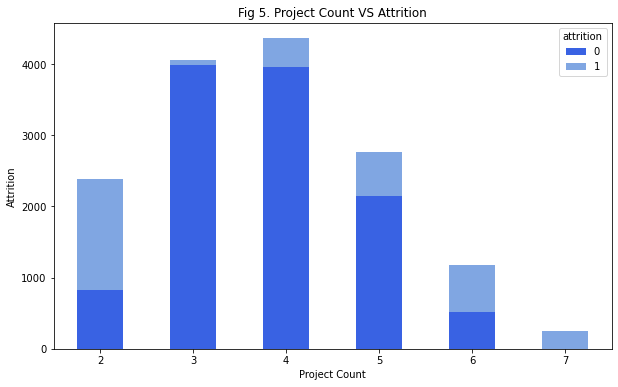

In [153]:
# projectCount VS Attrition using corss tab by sns
projectCount = pd.crosstab(df.projectCount, df.attrition)
projectCount.plot(kind='bar', stacked=True, figsize=(10,6),color=['#3962e3','#80a6e2'])
plt.title('Fig 5. Project Count VS Attrition')
plt.xlabel('Project Count')
plt.ylabel('Attrition')
plt.xticks(rotation=0)
plt.show()


The attrition rate is high for employees with 2 projects and 6 projects.Perhaps employees with 2 or fewer projects are likely not making enough significant contributions or may not feel adequately valued, leading to a higher likelihood of leaving the company. Conversely, those with 6 or more projects are prone to feeling overworked and are more likely to leave. It appears that employees with 3 projects are leaving the company at the lowest rate.

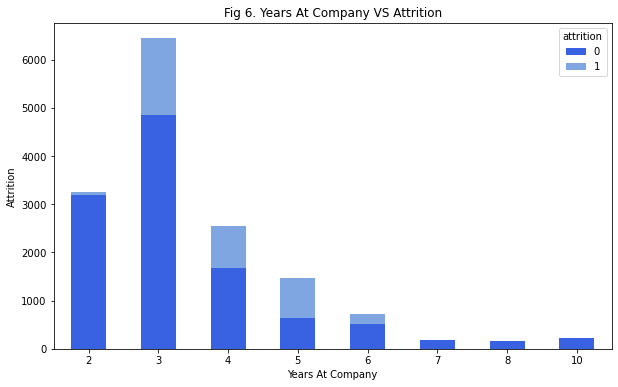

In [154]:
# time spend in company VS Attrition using corss tab 
yearsAtCompany = pd.crosstab(df.yearsAtCompany, df.attrition)
yearsAtCompany.plot(kind='bar', stacked=True, figsize=(10,6),color=['#3962e3','#80a6e2'])
plt.title('Fig 6. Years At Company VS Attrition')
plt.xlabel('Years At Company')
plt.ylabel('Attrition')
plt.xticks(rotation=0)
plt.show()

Most of the departing employees had been with the company for 3-6 years before leaving, and none of the employees who had been with the company for 7-10 years left.

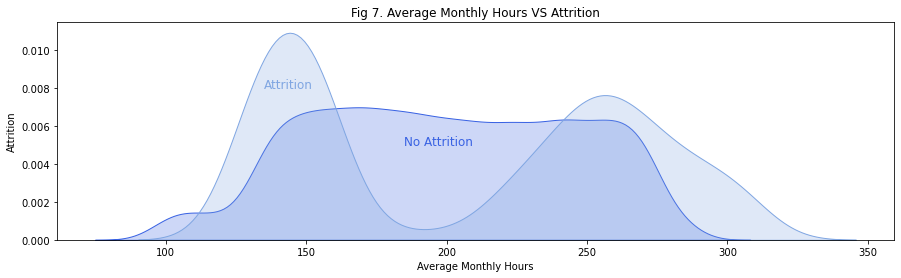

In [164]:
# averageMonthlyHours VS Attrition using #KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['attrition'] == 0),'averageMonthlyHours'] , color='#3962e3',shade=True,label='no attrition')
ax=sns.kdeplot(df.loc[(df['attrition'] == 1),'averageMonthlyHours'] , color='#80a6e2',shade=True, label='attrition')
plt.title('Fig 7. Average Monthly Hours VS Attrition')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Attrition')
plt.text(185, 0.005, 'No Attrition', color='#3962e3', fontsize=12)  # Adjust x, y coordinates and fontsize as needed
plt.text(135, 0.008, 'Attrition', color='#80a6e2', fontsize=12)  # Adjust x, y coordinates and fontsize as needed

plt.show()



Figure 7 shows a clear bimodal distribution, illustrating that employees who work fewer hours per month on average (below 150 hours) and those who work more hours (above 250 hours) have the highest turnover rates.

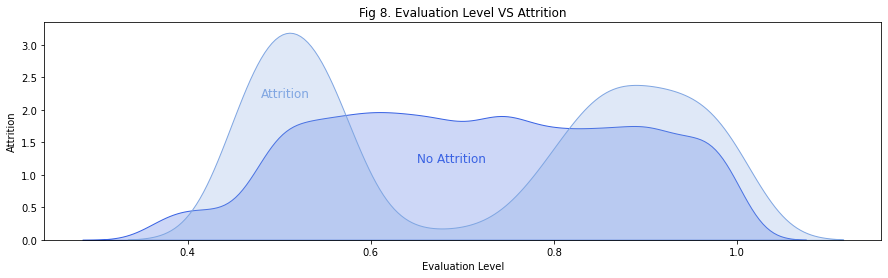

In [165]:
# evaluation_level VS Attrition using #KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['attrition'] == 0),'evaluation_level'] , color='#3962e3',shade=True,label='no attrition')
ax=sns.kdeplot(df.loc[(df['attrition'] == 1),'evaluation_level'] , color='#80a6e2',shade=True, label='attrition')
plt.title('Fig 8. Evaluation Level VS Attrition')
plt.xlabel('Evaluation Level')
plt.ylabel('Attrition')
plt.text(0.65, 1.2, 'No Attrition', color='#3962e3', fontsize=12)  # Adjust x, y coordinates and fontsize as needed
plt.text(0.48, 2.2, 'Attrition', color='#80a6e2', fontsize=12)  # Adjust x, y coordinates and fontsize as needed
plt.show()

Another bimodal distribution, with two peaks in departures for poor and excellent performers. based on the previous analysis, employees with excellent performance evaluations are not translated accordingly by the company into promotions and salaries. between 0.6 and 0.8 there is a better retention of employees.

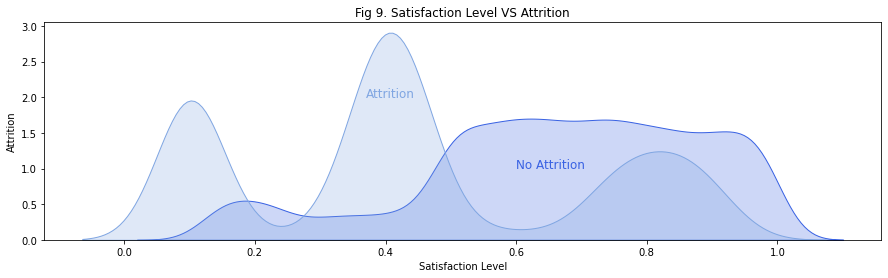

In [166]:
# satisfaction_level VS Attrition using #KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['attrition'] == 0),'satisfaction_level'] , color='#3962e3',shade=True,label='no attrition')
ax=sns.kdeplot(df.loc[(df['attrition'] == 1),'satisfaction_level'] , color='#80a6e2',shade=True, label='attrition')
plt.title('Fig 9. Satisfaction Level VS Attrition')
plt.xlabel('Satisfaction Level')
plt.ylabel('Attrition')
plt.text(0.6, 1, 'No Attrition', color='#3962e3', fontsize=12)  # Adjust x, y coordinates and fontsize as needed
plt.text(0.37, 2, 'Attrition', color='#80a6e2', fontsize=12)  # Adjust x, y coordinates and fontsize as needed
plt.show()

Figure 9 is a tri-modal, which points out that employees with satisfaction below 0.1 basically leave the company, employees who leave with satisfaction between 0.3 and 0.5 reach another peak, and another peak occurs when satisfaction is around 0.8, these are the employees with higher satisfaction, and these employees may have found better job opportunities, and leaving the job is not a dissatisfaction with the company, and these employees have a relatively high level of Satisfaction.

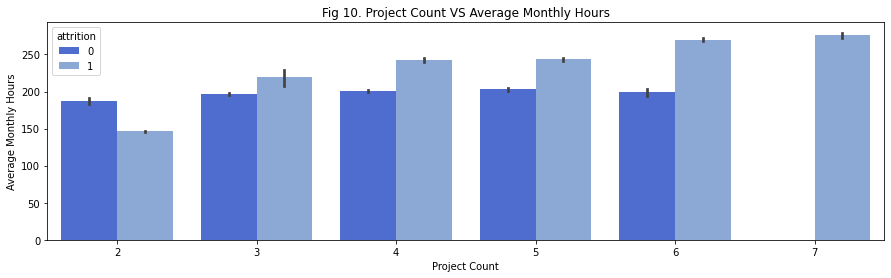

In [168]:
# projectCount VS averageMonthlyHours 
fig = plt.figure(figsize=(15,4))
# Define a custom color palette
custom_palette = ['#3962e3', '#80a6e2']  #'#3962e3'deep blue for 'no attrition', '#80a6e2' for 'attrition'
sns.barplot(x="projectCount", y="averageMonthlyHours", hue="attrition", data=df, palette=custom_palette)
plt.title('Fig 10. Project Count VS Average Monthly Hours')
plt.xlabel('Project Count')
plt.ylabel('Average Monthly Hours')
plt.show()
# Figure 10 shows that employees who left the company had a higher average monthly hours compared to employees who stayed in the company.

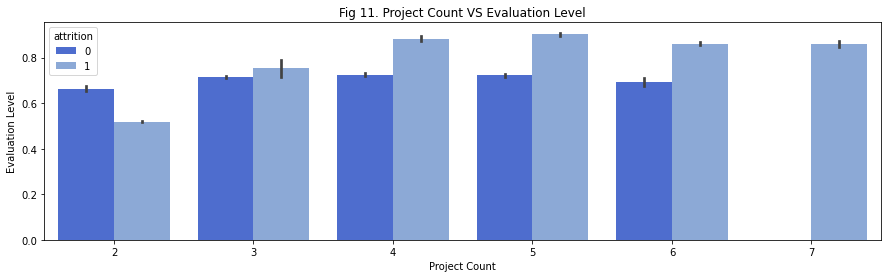

In [169]:
# projectCount VS evaluation_level
fig = plt.figure(figsize=(15,4))
# Define a custom color palette
custom_palette = ['#3962e3', '#80a6e2']  #'#3962e3'deep blue for 'no attrition', '#80a6e2' for 'attrition'
sns.barplot(x="projectCount", y="evaluation_level", hue="attrition", data=df, palette=custom_palette)
plt.title('Fig 11. Project Count VS Evaluation Level')
plt.xlabel('Project Count')
plt.ylabel('Evaluation Level')
plt.show()
# Figure 11 shows that employees who left the company had a higher evaluation level compared to employees who stayed in the company.

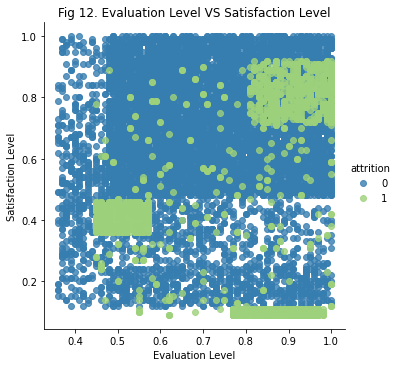

In [172]:
# evaluation_level VS satisfaction_level by using lmplot 
custom_palette1 = ['#367db0', '#9ed17b']
sns.lmplot(x='evaluation_level', y='satisfaction_level', data=df, fit_reg=False, hue='attrition', palette=custom_palette1)
plt.title('Fig 12. Evaluation Level VS Satisfaction Level')
plt.xlabel('Evaluation Level')
plt.ylabel('Satisfaction Level')
plt.show()
# explain the lmplot figure


Accuracy: 0.9868888888888889
OOB Score: 0.989522811696352
Confusion Matrix:
 [[3418   10]
 [  49 1023]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.95      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



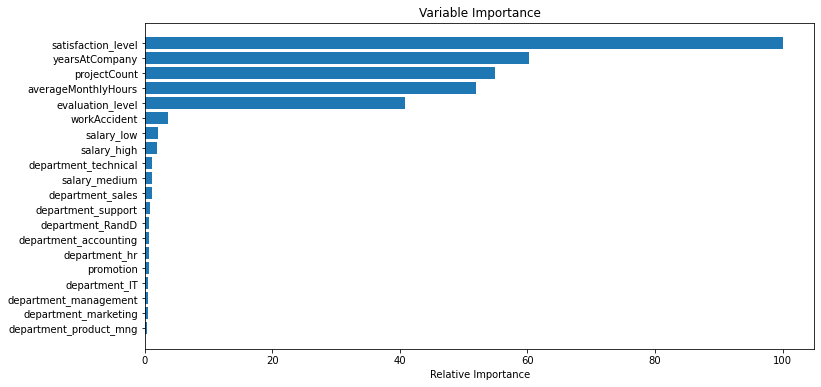

In [161]:
# development of a model to predict employee attrition by random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['department', 'salary'])

# Define the target variable
y = df['attrition']
X = df.drop(['attrition'], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the classifier
print('Accuracy:', accuracy_score(y_test, y_pred))
print('OOB Score:', rf.oob_score_)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Feature importance
feature_importance = rf.feature_importances_

# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# The results show that the most important features are satisfaction_level, yearsAtCompany, evaluation_level, and averageMonthlyHours.
# The model has an accuracy of 98.8% and an OOB score of 98.8%.
# The confusion matrix shows that the model has a high true positive rate and true negative rate.

To sum up, the Random Forest model exhibits excellent performance with high accuracy, OOB score, and strong metrics across precision, recall, and F1-scores. The confusion matrix indicates minimal misclassifications, with more errors in predicting Class 1 compared to Class 0. The detailed classification report confirms the model's robustness and ability to generalize well to new data.

**Result Analysis**
1. Accuracy
 Accuracy: 0.9868888888888889

  Accuracy measures the overall correctness of the model, representing the proportion of true results (both true positives and true negatives) among the total number of cases examined. An accuracy of 0.9869 means that approximately 98.69% of the predictions made by the model are correct.

2. Out-of-Bag (OOB) Score
 OOB Score: 0.989522811696352

  The OOB score is a measure of the model's generalization performance using the out-of-bag samples. Random forests use bootstrap aggregating (bagging), and the OOB score is computed on the data points not included in the bootstrap sample for each tree. An OOB score of 0.9895 indicates that the model generalizes very well to unseen data, with an accuracy of about 98.95%.

3. Confusion Matrix
[[3418   10]
[ 49  1023]]
 The confusion matrix provides a detailed breakdown of the classification results, showing the number of true positives, true negatives, false positives, and false negatives.
- True Negatives (TN): 3418 (Class 0 correctly classified)
- False Positives (FP): 10 (Class 0 incorrectly classified as Class 1)
- False Negatives (FN): 49 (Class 1 incorrectly classified as Class 0)
- True Positives (TP): 1023 (Class 1 correctly classified)

 This breakdown helps in understanding the types of errors the model is making.

4. Classification Report
 The classification report provides several key metrics for each class:

- *Precision*: The ratio of correctly predicted positive observations to the total predicted positives. High precision (0.99 for both classes) indicates that the model has a low false positive rate.
  - Class 0: 0.99
  - Class 1: 0.99

- *Recall (Sensitivity)*: The ratio of correctly predicted positive observations to all observations in the actual class. High recall for Class 0 (1.00) and slightly lower for Class 1 (0.95) indicates that the model is very good at identifying Class 0 instances, with a few misses in Class 1.
  - Class 0: 1.00
  - Class 1: 0.95

- *F1-Score*: The weighted average of precision and recall, providing a balance between the two metrics. The F1-score is high for both classes (0.99 for Class 0 and 0.97 for Class 1), indicating strong overall performance.
  - Class 0: 0.99
  - Class 1: 0.97

- *Support*: The number of actual occurrences of the class in the dataset. There are 3428 instances of Class 0 and 1072 instances of Class 1.

- *Accuracy*: Overall, the model's accuracy is 0.99, confirming that 99% of all predictions are correct.

- Macro Average: The unweighted mean of the precision, recall, and F1-score. It treats all classes equally, providing an average performance metric.
  - Precision: 0.99
  - Recall: 0.98
  - F1-Score: 0.98

- *Weighted Average*: The mean of precision, recall, and F1-score, weighted by the number of instances of each class. This metric accounts for the imbalance in class distribution.
  - Precision: 0.99
  - Recall: 0.99
  - F1-Score: 0.99





